<a href="https://colab.research.google.com/github/SSDivyaRavali/CDS/blob/main/Module3/Emotion_Classification_from_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Speech Emotion Classification

## Problem Statement

Build a model to recognize emotion from speech using Ensemble learning 

## Learning Objectives

At the end of the mini-project, you will be able to :

* extract the features from audio data
* implement ML classification algorithms individually and as Ensembles, to classify emotions
* record the voice sample and test it with trained model

# Converting into a wave format:

Waves are repeated signals that oscillate and vary in amplitude, depending on their complexity.
This is because MP3 is a lossy music compression format that cuts out parts that the human ear cannot perceive. This is nice for storing because with MP3, you can fit ten times as many songs on your device. For our endeavor, however, it is not so nice. For classification we will have an easier time with WAV files, so we will have to convert our MP3 file in case we would want to use them with our classifiers.One advantage of having all our music files in the WAV format is that it is directly readable by the **SciPy** toolkit

sample_rate, X = scipy.io.wavfile.read(wave_filename)

Here, X contains the samples and sample_rate is the rate at which they were taken.Depending on the sample rate — the number of points sampled per second to quantify the signal — one second of data could contain thousands of points.

Say sample_rate is 100,This means that for every recorded second of audio, the computer will place 100 points along the signal in attempts to best “trace” the continuous curve. Once all the points are in place, a smooth curve joins them all together for humans to be able to visualize the sound. Since the recorded audio is in terms of amplitude and time, we can intuitively say that the wave form operates in the time domain

## Dataset

**TESS Dataset**

The first dataset chosen for this mini-project is the [TESS](https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF) (Toronto emotional speech set) dataset. It contains 2880 files.  A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses and the sets were recorded in seven different emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). Both actresses spoke English as their first language, were university educated, and had musical training. Audiometric testing indicated that both actresses had thresholds within the normal range.

**Ravdess Dataset**

The second dataset chosen for this mini-project is [Ravdess](https://zenodo.org/record/1188976#.YLczy4XivIU) (The Ryerson Audio-Visual Database of Emotional Speech and Song). This dataset contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: `03-01-06-01-02-01-12.wav`

    - Audio-only - 03
    - Speech - 01
    - Fearful - 06
    - Normal intensity - 01
    - Statement "dogs" - 02
    - 1st Repetition - 01
    - 12th Actor - 12 Female, as the actor ID number is even.

## Information

**Speech Emotion Recognition (SER)** is the task of recognizing the emotion from  speech, irrespective of the semantics. Humans can efficiently perform this task as a natural part of speech communication, however, the ability to conduct it automatically using programmable devices is a field of active research.

Studies of automatic emotion recognition systems aim to create efficient, real-time methods of detecting the emotions of mobile phone users, call center operators and customers, car drivers, pilots, and many other human-machine communication users. Adding emotions to machines forms an important aspect of making machines appear and act in a human-like manner

Lets gain familiarity with some of the audio based features that are commonly used for SER. 

**Mel scale** — The mel scale (derived from the word *melody*) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments. Refer [here](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8) for more detailed information.

**Pitch** — how high or low a sound is. It depends on frequency, higher pitch is high frequency

**Frequency** — speed of vibration of sound, measures wave cycles per second

**Chroma** — Representation for audio where spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma). Computed by summing the log frequency magnitude spectrum across octaves.

**Fourier Transforms** — used to convert from time domain to frequency domain. Time domain shows how signal changes over time. Frequency domain shows how much of the signal lies within each given frequency band over a range of frequencies

**Mel Scale** The Mel Scale is a logarithmic transformation of a signal's frequency. The core idea of this transformation is that sounds of equal distance on the Mel Scale are perceived to be of equal distance to humans.The transformation from the Hertz scale to the Mel Scale is the following:

* m=1127.log(1+f/700)

**Librosa**

[Librosa](https://librosa.org/doc/latest/index.html) is a Python package, built for speech and audio analytics. It provides modular functions that simplify working with audio data and help in achieving a wide range of applications such as identification of the personal characteristics of different individuals' voice samples, detecting emotions from audio samples etc. 

For further details on the Librosa package, refer [here](https://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf).


## Grading = 10 Points

In [ ]:
import os,random
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
main_path = "/content/gdrive/MyDrive/Projects/Emotion_Classification/M4_MP4_Ravdess_Tess"

In [ ]:
TESS = os.path.join(main_path, "Tess/")
RAV = os.path.join(main_path, "ravdess/")

In [ ]:
!pwd

/content


### Import Neccesary Packages

In [ ]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import warnings
warnings.filterwarnings('ignore')
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import VotingClassifier


In [ ]:
# Set seed for experiment reproducibility
seed = 42
np.random.seed(seed)

### Work-Flow

* Load the TESS audio data and extract features and labels

* Load the Ravdess audio data and extract features

* Combine both the audio dataset features

* Train and test the model with TESS + Ravdess Data

* Record the team audio samples and add them to TESS + Ravdess data

* Train and test the model with TESS + Ravdess + Team Recorded (combined) data

* Test each of the models with live audio sample recording.

### Load the Tess data and Ravdess data audio files (1 point)

Hint: `glob.glob`. glob library in order to get objects that allow to iterate over all files in a folder.

In [ ]:
# The glob module is used to retrieve files/pathnames matching a specified pattern.faster than other methods to match pathnames in directories
'''
WARNING : 
    glob library doesn't retrieve files on specific order. Be sure to control the order when retrieving
    production data in order to ensure a reproducible model.
'''
#directories of datasets
Tess_data_dir =TESS
Ravdess_data_dir = RAV
Ravdess_audio_files = glob.glob(Ravdess_data_dir + "/*/*.wav")
Tess_audio_files = glob.glob(Tess_data_dir + "/*/*.wav")
print(f'Number of Tess dataset audios files : {len(Tess_audio_files)}')
print(f'Number of Ravdess Dataset audios files : {len(Ravdess_audio_files)}')

Number of Tess dataset audios files : 2679
Number of Ravdess Dataset audios files : 1168


#### Play the sample audio

In [ ]:
# Sample audio
Sample=random.choice(Tess_audio_files)
ipd.Audio(Sample)


### Data Exploration and Visualization (1 points)

#### Visualize sample audio signal using librosa

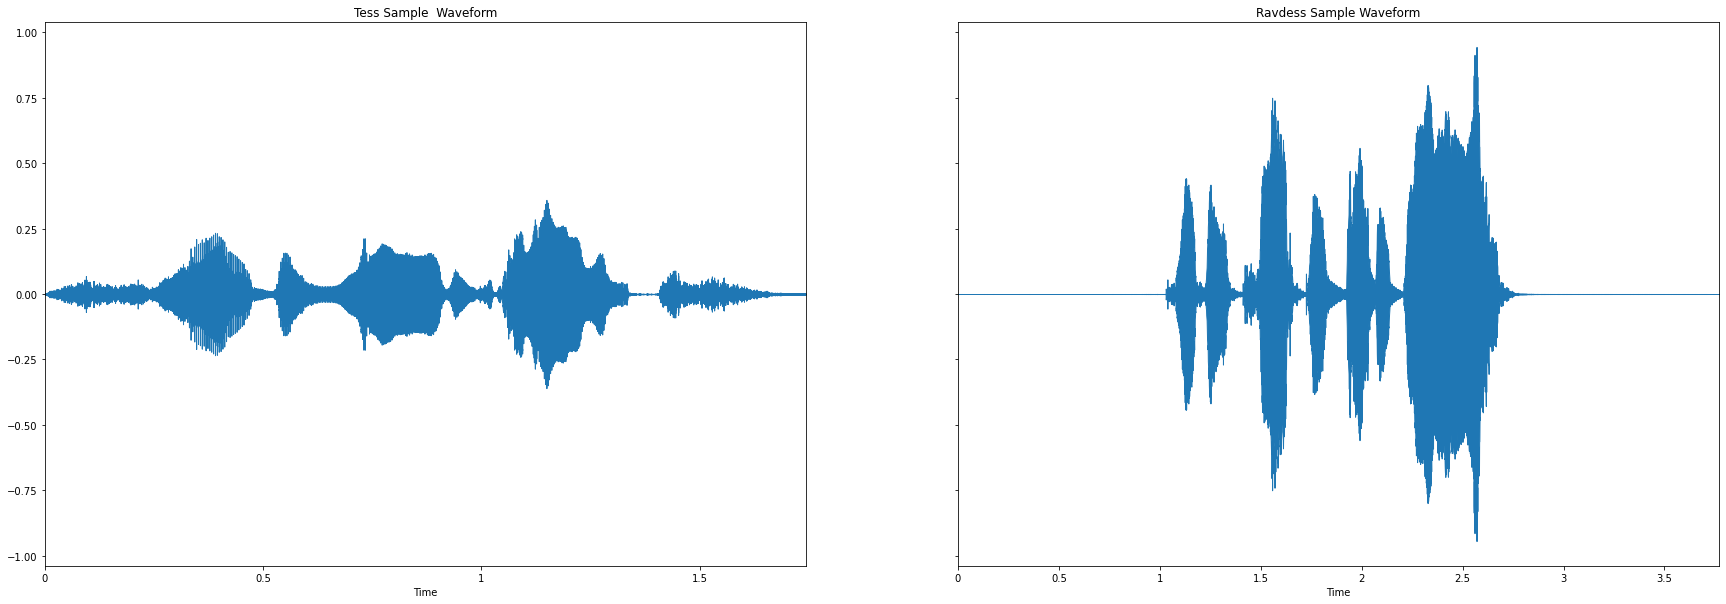

In [ ]:
#Visualizing waveforms
sample_1 = random.choice(Tess_audio_files)
sample_2 = random.choice(Ravdess_audio_files)
data_1, sr_1 = librosa.load(sample_1)
data_2, sr_2 = librosa.load(sample_2)

fig, ax = plt.subplots(1,2, figsize = (30,10), sharey = True)
librosa.display.waveplot(data_1, sr=sr_1, ax=ax[0])
ax[0].set(title = 'Tess Sample  Waveform')
librosa.display.waveplot(data_2, sr=sr_2, ax=ax[1])
ax[1].set(title = 'Ravdess Sample Waveform')
plt.show()

Audio signals do not just suddenly disappear, they in fact fade out until it is impossible to perceive. This means that in terms of audio, this constitutes as null data.

# Null Data in Audio

There are many ways to treat null audio data in the time domain.
Given the signal and a minimum threshold for the amplitude of the signal:
* Take the absolute value of each point in the signal
* If the point is greater than the threshold, we keep it. Otherwise, we remove it.
Thresholds are a sort of parameter for the recordings. Different thresholds work differently for various sounds

In [ ]:
# Create function for mask
def env_mask(wav,sr, threshold):
    # Absolute value
    wav = np.abs(wav)
    # Point wise mask determination.
    mask = wav > threshold
    return mask
# Initialize mask

# Plotting the new signals
#fig, ax = plt.subplots(1,2, figsize = (30,10), sharey = True)
# Visualize wave plots with mask applied.
plt.show()

**FEATURES:-**
While Deep Learning often utilizes processes in the frequency domain,there are still many relevant features to be leveraged within the time domain that are relevant to many Machine Learning techniques.These features can be extracted and analyzed to understand the wave form’s properties.

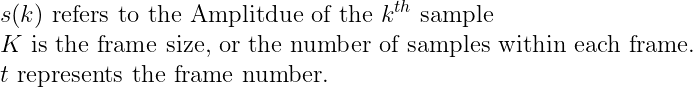

A **spectrogram** is a figure which represents the spectrum of frequencies of a recorded audio over time,It is is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.This means that as we get brighter in color in the figure, the sound is heavily concentrated around those specific frequencies, allowing us to get a good understanding of the shape and structure of the audio without even listening to it!

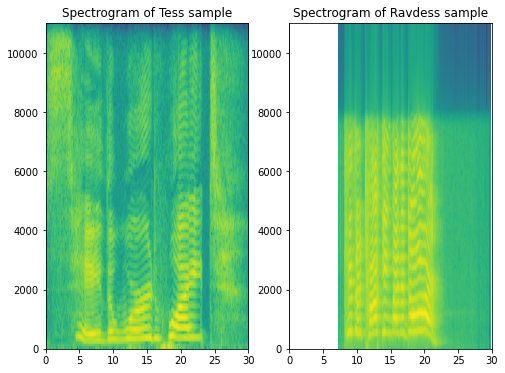

In [ ]:
from matplotlib.pyplot import specgram
fig, ax = plt.subplots(1,2, figsize = (8,6))
ax[0].set(title = 'Spectrogram of Tess sample')
ax[0].specgram(data_1, Fs=sr_1, xextent=(0,30))
ax[1].set(title = 'Spectrogram of Ravdess sample')
ax[1].specgram(data_2, Fs=sr_2, xextent=(0,30))
plt.show()

Mel Spectrograms are spectrograms that visualize sounds on the Mel scale as opposed to the frequency domain.

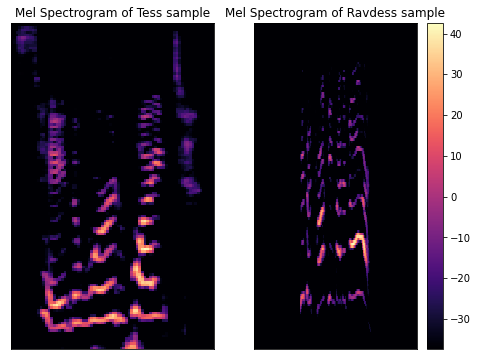

In [ ]:
# Create Mel Spectrograms of sounds
TSpec = librosa.feature.melspectrogram(data_1)
RSpec = librosa.feature.melspectrogram(data_2)
# Convert amplitudes to dB
TSpec = librosa.amplitude_to_db(TSpec)
RSpec = librosa.amplitude_to_db(RSpec)
# Plot mel spectrograms
fig, ax = plt.subplots(1,2, figsize = (8,6))
ax[0].set(title = 'Mel Spectrogram of Tess sample')
i = librosa.display.specshow(TSpec, ax=ax[0], cmap = 'magma')
ax[1].set(title = 'Mel Spectrogram of Ravdess sample')
librosa.display.specshow(RSpec, ax=ax[1], cmap = 'magma')
plt.colorbar(i)

Mel Frequency Cepstral Coefficients (MFCCs) were originally used in various speech processing techniques. MFCCs could represent timbre quite well.
The basic procedure to develop MFCCs is the following:
* Convert from Hertz to Mel Scale
* Take logarithm of Mel representation of audio
* Take logarithmic magnitude and use Discrete Cosine Transformation (DCT)
* This result creates a spectrum over Mel frequencies as opposed to time, thus creating MFCCs.

If the ML problem warrants MFCCs to be used, such as automatic speech recognition or denoising audio, the number of coefficients used is a hyperparameter of the model. Because of this, the number of MFCCs will vary based on the problem. However, we will use librosa's default 20 MFCCs

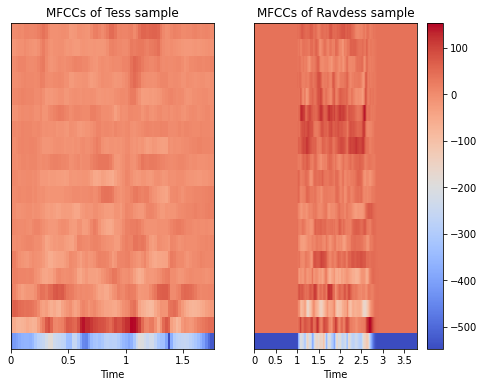

In [ ]:
# Take MFCCs of sounds:
TMFCC = librosa.feature.mfcc(data_1)
RMFCC = librosa.feature.mfcc(data_2)
# Plot MFCCs
fig, ax = plt.subplots(1,2, figsize = (8,6))
ax[0].set(title = 'MFCCs of Tess sample')
i = librosa.display.specshow(TMFCC, x_axis='time', ax=ax[0])
ax[1].set(title = 'MFCCs of Ravdess sample')
librosa.display.specshow(RMFCC, x_axis='time', ax=ax[1])
plt.colorbar(i)

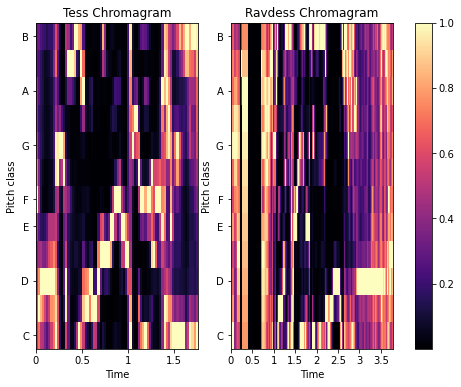

In [ ]:
# Create chromagrams
T_chroma = librosa.feature.chroma_stft(data_1, sr=sr_1)
R_chroma = librosa.feature.chroma_stft(data_2, sr=sr_2)

# Visualize the STFT chromagrams
fig, ax = plt.subplots(1,2, figsize=(8,6))
img = librosa.display.specshow(T_chroma, y_axis = 'chroma', x_axis='time', ax=ax[0])
ax[0].set(title = 'Tess Chromagram')
librosa.display.specshow(R_chroma, y_axis = 'chroma', x_axis='time', ax=ax[1])
ax[1].set(title = 'Ravdess Chromagram')
fig.colorbar(img, ax=ax)
plt.show()

### Feature extraction (2 points)

Read one WAV file at a time using `Librosa`. An audio time series in the form of a 1-dimensional array for mono or 2-dimensional array for stereo, along with time sampling rate (which defines the length of the array), where the elements within each of the arrays represent the amplitude of the sound waves is returned by `librosa.load()` function. Refer to the supplementary notebook ('Audio feature extraction')

To know more about Librosa, explore the [link](https://librosa.org/doc/latest/feature.html)

#### Create a dictionary or a function to encode the emotions

In [ ]:
#Name Convention differences
Tess_directory_list = os.listdir(TESS)

file_emotion = []
file_path = []

for dir in Tess_directory_list:
  directories = os.listdir(TESS + dir)
  for file in directories:
    # storing file emotions
    part = file.split('.')[0]
    part = part.split('_')[2]
    if part == 'sad' or part == 'Sad':
        file_emotion.append('sad')
    elif part == 'ang':
        file_emotion.append('angry')
    elif part== 'dis':
        file_emotion.append('disgust')
    elif part == 'fea' or part == 'Fear':
        file_emotion.append('fear')
    elif part == 'hap':
        file_emotion.append('happy')
    elif part == 'neu':
        file_emotion.append('neutral')
    else:
        file_emotion.append('surprise')   
    #else:
        #file_emotion.append('Unknown')
    file_path.append(TESS + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,sad,/content/gdrive/MyDrive/Projects/Emotion_Class...
1,sad,/content/gdrive/MyDrive/Projects/Emotion_Class...
2,sad,/content/gdrive/MyDrive/Projects/Emotion_Class...
3,sad,/content/gdrive/MyDrive/Projects/Emotion_Class...
4,sad,/content/gdrive/MyDrive/Projects/Emotion_Class...


#### TESS data feature extraction

In [ ]:
tess_directory_list = os.listdir(TESS)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(TESS + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(TESS + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df1 = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df1 = pd.DataFrame(file_path, columns=['Path'])
Tess_df1 = pd.concat([emotion_df1, path_df1], axis=1)
Tess_df1.shape ,Tess_df1.head()

((2679, 2),   Emotions                                               Path
 0      sad  /content/gdrive/MyDrive/Projects/Emotion_Class...
 1      sad  /content/gdrive/MyDrive/Projects/Emotion_Class...
 2      sad  /content/gdrive/MyDrive/Projects/Emotion_Class...
 3      sad  /content/gdrive/MyDrive/Projects/Emotion_Class...
 4      sad  /content/gdrive/MyDrive/Projects/Emotion_Class...)

In [ ]:
Tess_df is Tess_df1

#### Ravdess data feature extraction

In [ ]:
ravdess_directory_list = os.listdir(RAV)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(RAV + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(RAV + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
print(emotion_df.head())
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

   Emotions
0         1
1         1
2         3
3         3
4         3


,Emotions,Path
0,neutral,/content/gdrive/MyDrive/Projects/Emotion_Class...
1,neutral,/content/gdrive/MyDrive/Projects/Emotion_Class...
2,happy,/content/gdrive/MyDrive/Projects/Emotion_Class...
3,happy,/content/gdrive/MyDrive/Projects/Emotion_Class...
4,happy,/content/gdrive/MyDrive/Projects/Emotion_Class...


#### Save the features

It is best advised to save the features in dataframe and maintain so that feature extraction step is not required to be performed every time.

* Make a DataFrame with features and labels

* Write dataframe into `.CSV` file and save it offline.

In [ ]:
# creating Dataframe using all the 2 dataframes we created so far.
data_path = pd.concat([Ravdess_df,Tess_df1], axis = 0)
data_path_dask=dd.from_pandas(data_path, npartitions=4)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,/content/gdrive/MyDrive/Projects/Emotion_Class...
1,neutral,/content/gdrive/MyDrive/Projects/Emotion_Class...
2,happy,/content/gdrive/MyDrive/Projects/Emotion_Class...
3,happy,/content/gdrive/MyDrive/Projects/Emotion_Class...
4,happy,/content/gdrive/MyDrive/Projects/Emotion_Class...


In [ ]:
len(data_path)

3847

#### Visualize the distribution of all the labels

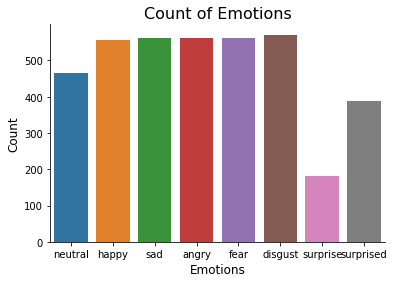

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

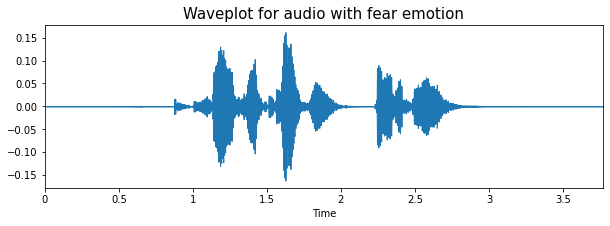

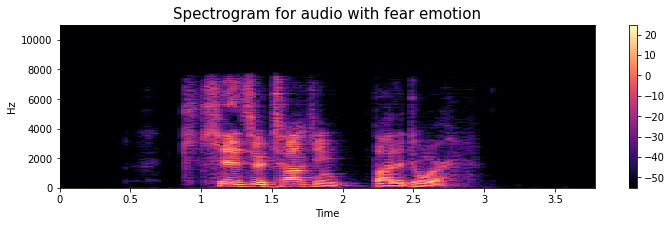

In [ ]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipd.Audio(path)

# Data Augmentation

Data augmentation is the process by which we create new synthetic data samples by adding small perturbations on our initial training set.
To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.
The objective is to make our model invariant to those perturbations and enhace its ability to generalize.
In order to this to work adding the perturbations must conserve the same label as the original training sample

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

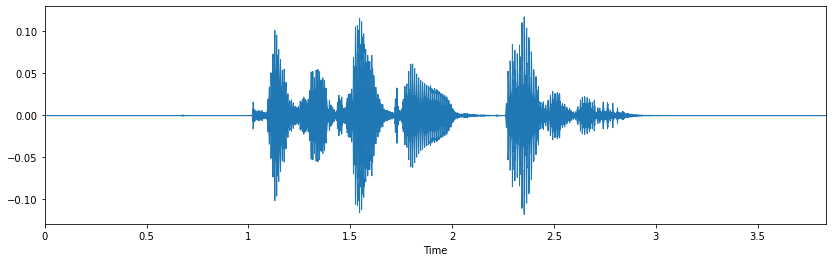

In [ ]:
#simple Audio
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
ipd.Audio(path)

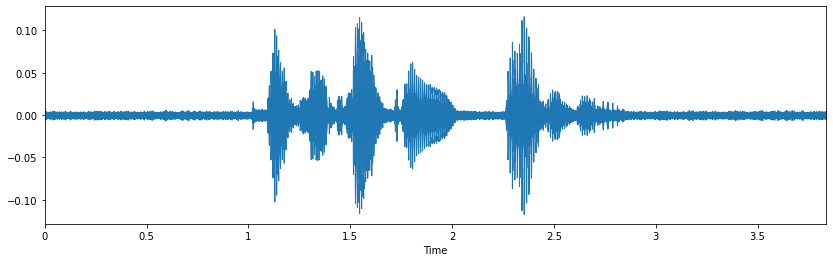

In [ ]:
#Noise Injection
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

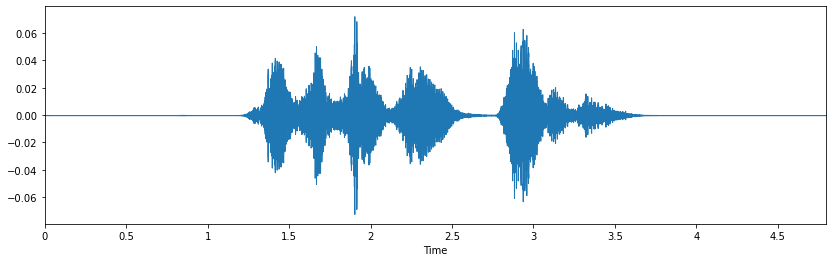

In [ ]:
#Stretch
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

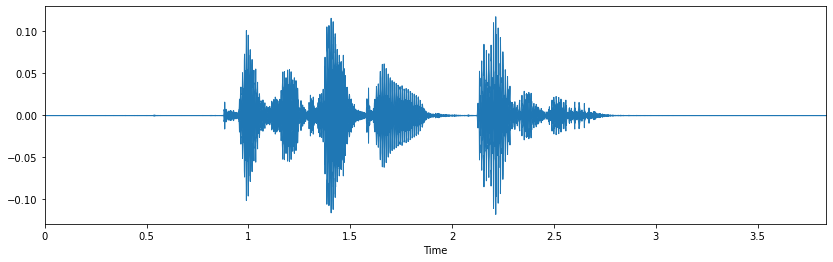

In [ ]:
#Shifting
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

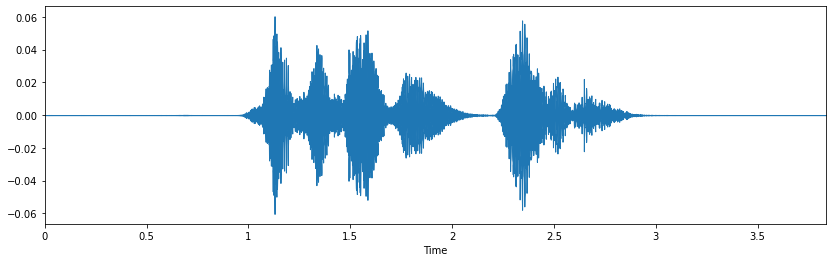

In [ ]:
#Pitch
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

### Feature extraction (2 points)


In [ ]:
import numba
from numba import jit
@jit(nopython=False, parallel=True)
def extract_features(data, mfcc=True, chroma=True, mel=True):
  #X,sample_rate = librosa.load(file_name)
  X=data
  result=np.array([])
  # STFT = short-term fourier transformation
  if chroma:
    stft=np.abs(librosa.stft(X))
  # MFCC = Mel-frequency Cepstral coefficients
  if mfcc:
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    result=np.hstack((result, mfccs))# stacking horizontally
  # Compute a chromogram from a waveform or power spectogram
  if chroma:
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))# stacking horizontally
  # Compute a mel-scaled spectrogram
  if mel:
    mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel)) # stacking horizontally
  return result

In [ ]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    return result

In [ ]:
for path, emotion in zip(data_path.Path[0], data_path.Emotions[0]):
    feature = get_features(path)
len(feature[2]),feature #3 results to be stacked vertically

(180, array([[-5.43512695e+02,  1.02715080e+02,  3.29588089e+01,
          2.15734215e+01,  2.54370155e+01,  1.01566133e+01,
         -6.02500820e+00, -1.27481585e+01, -1.43233328e+01,
         -1.90486085e+00, -1.54552660e+01,  4.80083793e-01,
         -5.60362005e+00,  8.45506549e-01,  1.84644544e+00,
         -4.91414118e+00,  2.23453569e+00,  1.28935575e+00,
          1.85256392e-01, -5.51406765e+00,  4.60102892e+00,
         -3.30117917e+00, -4.23431826e+00, -3.69140816e+00,
         -6.90949154e+00,  4.10642958e+00, -7.23568726e+00,
          3.68924665e+00, -4.29040337e+00,  1.80293310e+00,
         -6.75783217e-01,  8.11804485e+00,  5.12258339e+00,
          9.43418503e+00,  7.48850775e+00,  8.86848450e+00,
          3.98754930e+00,  8.76572895e+00,  7.47014999e+00,
          1.30948067e+01,  3.78472298e-01,  3.36612791e-01,
          2.99550116e-01,  3.28431606e-01,  4.33445960e-01,
          5.09413302e-01,  4.36770827e-01,  4.75039274e-01,
          5.01711071e-01,  4.475799

In [ ]:
feature

array([[-5.43512695e+02,  1.02715080e+02,  3.29588089e+01,
         2.15734215e+01,  2.54370155e+01,  1.01566133e+01,
        -6.02500820e+00, -1.27481585e+01, -1.43233328e+01,
        -1.90486085e+00, -1.54552660e+01,  4.80083793e-01,
        -5.60362005e+00,  8.45506549e-01,  1.84644544e+00,
        -4.91414118e+00,  2.23453569e+00,  1.28935575e+00,
         1.85256392e-01, -5.51406765e+00,  4.60102892e+00,
        -3.30117917e+00, -4.23431826e+00, -3.69140816e+00,
        -6.90949154e+00,  4.10642958e+00, -7.23568726e+00,
         3.68924665e+00, -4.29040337e+00,  1.80293310e+00,
        -6.75783217e-01,  8.11804485e+00,  5.12258339e+00,
         9.43418503e+00,  7.48850775e+00,  8.86848450e+00,
         3.98754930e+00,  8.76572895e+00,  7.47014999e+00,
         1.30948067e+01,  3.78472298e-01,  3.36612791e-01,
         2.99550116e-01,  3.28431606e-01,  4.33445960e-01,
         5.09413302e-01,  4.36770827e-01,  4.75039274e-01,
         5.01711071e-01,  4.47579980e-01,  4.10234302e-0

In [ ]:
X_100, Y_100 = [], []
for path, emotion in zip(data_path.Path[0:100], data_path.Emotions[0:100]):
    feature = get_features(path)
    for ele in feature:
        X_100.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y_100.append(emotion)

In [ ]:
X_200, Y_200 = [], []
for path, emotion in zip(data_path.Path[0:100], data_path.Emotions[0:100]):
    feature = get_features(path)
    for ele in feature:
        X_200.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y_200.append(emotion)

In [ ]:
Features = pd.DataFrame(X_100)
Features['labels'] = Y_100
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,labels
0,-525.006104,119.068268,-3.233290,34.656387,-0.013051,-0.033899,-2.393293,-5.878879,-16.757565,-0.893247,0.157767,-7.830841,1.321926,-0.618335,0.008786,-5.333261,-1.633765,-2.238352,1.535098,-2.726022,-4.331009,-0.231760,-5.279940,-4.377237,-4.182912,-2.381046,-4.722716,-2.006656,-0.523416,0.342277,-0.684832,-3.202951,-2.210840,-3.016846,-0.968166,-2.352385,-2.835750,-4.485838,-3.345639,-2.528118,...,0.000078,0.000096,0.000190,0.000284,0.000347,0.000250,0.000316,0.000189,0.000249,0.000256,0.000325,0.000193,0.000109,0.000071,0.000077,0.000078,0.000086,0.000093,0.000051,0.000080,0.000048,0.000057,0.000046,0.000045,0.000026,0.000011,4.450408e-07,8.965598e-10,4.230988e-12,3.356929e-12,2.805802e-12,2.415987e-12,2.133651e-12,1.920926e-12,1.759935e-12,1.639848e-12,1.551089e-12,1.490836e-12,1.454159e-12,neutral
1,-406.966534,56.942918,15.538327,14.805830,2.492807,-2.184521,-1.088977,-6.688590,-11.780651,-4.095603,-1.166144,-4.849725,-1.864995,-0.517658,-2.811973,-3.697385,-2.746091,-2.152783,-0.117877,-2.074748,-3.673183,-1.616037,-3.415758,-4.565876,-3.089522,-3.511650,-4.531882,-2.068025,-0.618206,-0.725694,-1.120711,-1.694605,-1.986418,-2.090795,-1.909476,-2.192208,-1.941773,-3.028209,-2.815245,-2.540372,...,0.000136,0.000146,0.000242,0.000370,0.000422,0.000300,0.000368,0.000244,0.000304,0.000308,0.000389,0.000248,0.000163,0.000122,0.000139,0.000141,0.000154,0.000158,0.000105,0.000133,0.000105,0.000115,0.000100,0.000098,0.000084,0.000069,6.200005e-05,6.005066e-05,5.707279e-05,5.794420e-05,6.039736e-05,5.880788e-05,5.867434e-05,5.837248e-05,5.837650e-05,5.908364e-05,5.646140e-05,5.903699e-05,5.868041e-05,neutral
2,-588.466797,123.829659,-7.830422,38.749462,-7.750144,1.922010,-6.270317,-7.152444,-17.261871,3.571921,-1.223540,-5.748177,1.511764,-1.677388,-0.624428,-6.208317,-0.408979,-2.791173,3.437573,-5.178065,-2.970007,-1.741961,-5.612607,-3.702080,-3.681341,-3.272252,-4.648477,-0.037594,-2.352144,-0.889926,-4.409010,-2.683587,-1.656616,-0.526193,0.141703,-2.996654,-3.930205,-4.601506,-1.396631,-4.050448,...,0.000072,0.000036,0.000015,0.000036,0.000043,0.000093,0.000081,0.000086,0.000053,0.000054,0.000035,0.000062,0.000060,0.000029,0.000022,0.000017,0.000020,0.000015,0.000030,0.000014,0.000012,0.000015,0.000010,0.000012,0.000010,0.000007,3.709971e-06,5.860069e-07,8.453289e-09,1.621182e-11,1.351248e-11,1.270150e-11,1.288465e-11,1.229128e-11,1.155360e-11,1.332277e-11,1.575910e-11,1.818189e-11,1.990446e-11,neutral
3,-523.110779,114.551506,-11.314587,31.445080,-0.106641,-1.531982,-3.857402,-3.227073,-17.945736,-1.365573,-1.352620,-9.909266,0.644503,-2.137166,-0.949299,-7.661302,-2.439543,-4.205446,-0.431526,-3.289157,-4.987824,-0.701350,-7.296049,-6.054174,-4.911606,-3.374668,-6.409533,-2.286606,-2.042182,-2.247693,-1.200996,-4.201083,-2.588167,-3.231474,-1.302711,-2.202245,-3.644770,-3.672296,-2.529315,-3.488797,...,0.000097,0.000087,0.000183,0.000284,0.000242,0.000652,0.000508,0.000361,0.000415,0.000324,0.000200,0.000117,0.000137,0.000152,0.000112,0.000084,0.000128,0.000086,0.000077,0.000089,0.000096,0.000047,0.000034,0.000045,0.000034,0.000007,4.979771e-07,9.731230e-10,4.585861e-13,3.400664e-13,3.083412e-13,2.833414e-13,2.641858e-13,2.488687e-13,2.366570e-13,2.272861e-13,2.201493e-13,2.151854e-13,2.120396e-13,neutral
4,-373.981803,45.912783,12.255530,13.292122,3.173625,-4.412872,-2.866110,-5.555348,-10.737569,-4.750903,-1.396661,-5.157184,-2.153806,0.090177,-2.576599,-3.975565,-3.127029,-2.716541,-0.999338,-2.145657,-3.268087,-1.900594,-4.111019,-5.002204,-2.654329,-3.701248,-4.764940,-1.972913,-1.577579,-1.789128,-1.030488,-1.889072,-2.357610,-2.156911,-0.775099,-1.018025,-1.986801,-2.251340,-2.112944,-2.502735,...,0.000253,0.000228,0.000357,0.000452,0.00039

In [ ]:
Features.shape

(300, 181)

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path[0:500], data_path.Emotions[0:500]):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features_500.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,labels
0,-525.006104,119.068268,-3.233290,34.656387,-0.013051,-0.033899,-2.393293,-5.878879,-16.757565,-0.893247,0.157767,-7.830841,1.321926,-0.618335,0.008786,-5.333261,-1.633765,-2.238352,1.535098,-2.726022,-4.331009,-0.231760,-5.279940,-4.377237,-4.182912,-2.381046,-4.722716,-2.006656,-0.523416,0.342277,-0.684832,-3.202951,-2.210840,-3.016846,-0.968166,-2.352385,-2.835750,-4.485838,-3.345639,-2.528118,...,0.000078,0.000096,0.000190,0.000284,0.000347,0.000250,0.000316,0.000189,0.000249,0.000256,0.000325,0.000193,0.000109,0.000071,0.000077,0.000078,0.000086,0.000093,0.000051,0.000080,0.000048,0.000057,0.000046,0.000045,0.000026,0.000011,4.450408e-07,8.965598e-10,4.230988e-12,3.356929e-12,2.805802e-12,2.415987e-12,2.133651e-12,1.920926e-12,1.759935e-12,1.639848e-12,1.551089e-12,1.490836e-12,1.454159e-12,neutral
1,-381.408219,48.054371,16.592122,12.859572,2.161179,-2.438579,-1.712326,-6.372422,-9.857883,-4.642323,-1.741909,-4.128949,-2.059428,-1.019181,-2.526192,-3.172383,-2.239471,-1.786573,-0.302539,-2.145725,-3.270306,-2.018368,-4.049981,-4.832118,-3.214359,-2.998459,-4.087705,-1.970817,-0.857960,-0.739606,-1.357457,-2.224430,-1.929743,-2.297895,-1.444958,-1.491741,-2.229148,-3.029330,-2.928699,-2.459795,...,0.000224,0.000238,0.000316,0.000415,0.000493,0.000414,0.000473,0.000332,0.000395,0.000418,0.000464,0.000319,0.000237,0.000219,0.000214,0.000221,0.000219,0.000224,0.000183,0.000214,0.000181,0.000188,0.000183,0.000187,0.000161,0.000153,1.373383e-04,1.336995e-04,1.301316e-04,1.294155e-04,1.425115e-04,1.357750e-04,1.364827e-04,1.434532e-04,1.383179e-04,1.357221e-04,1.368543e-04,1.390265e-04,1.412013e-04,neutral
2,-588.466797,123.829659,-7.830422,38.749462,-7.750144,1.922010,-6.270317,-7.152444,-17.261871,3.571921,-1.223540,-5.748177,1.511764,-1.677388,-0.624428,-6.208317,-0.408979,-2.791173,3.437573,-5.178065,-2.970007,-1.741961,-5.612607,-3.702080,-3.681341,-3.272252,-4.648477,-0.037594,-2.352144,-0.889926,-4.409010,-2.683587,-1.656616,-0.526193,0.141703,-2.996654,-3.930205,-4.601506,-1.396631,-4.050448,...,0.000072,0.000036,0.000015,0.000036,0.000043,0.000093,0.000081,0.000086,0.000053,0.000054,0.000035,0.000062,0.000060,0.000029,0.000022,0.000017,0.000020,0.000015,0.000030,0.000014,0.000012,0.000015,0.000010,0.000012,0.000010,0.000007,3.709971e-06,5.860069e-07,8.453289e-09,1.621182e-11,1.351248e-11,1.270150e-11,1.288465e-11,1.229128e-11,1.155360e-11,1.332277e-11,1.575910e-11,1.818189e-11,1.990446e-11,neutral
3,-523.110779,114.551506,-11.314587,31.445080,-0.106641,-1.531982,-3.857402,-3.227073,-17.945736,-1.365573,-1.352620,-9.909266,0.644503,-2.137166,-0.949299,-7.661302,-2.439543,-4.205446,-0.431526,-3.289157,-4.987824,-0.701350,-7.296049,-6.054174,-4.911606,-3.374668,-6.409533,-2.286606,-2.042182,-2.247693,-1.200996,-4.201083,-2.588167,-3.231474,-1.302711,-2.202245,-3.644770,-3.672296,-2.529315,-3.488797,...,0.000097,0.000087,0.000183,0.000284,0.000242,0.000652,0.000508,0.000361,0.000415,0.000324,0.000200,0.000117,0.000137,0.000152,0.000112,0.000084,0.000128,0.000086,0.000077,0.000089,0.000096,0.000047,0.000034,0.000045,0.000034,0.000007,4.979771e-07,9.731230e-10,4.585861e-13,3.400664e-13,3.083412e-13,2.833414e-13,2.641858e-13,2.488687e-13,2.366570e-13,2.272861e-13,2.201493e-13,2.151854e-13,2.120396e-13,neutral
4,-487.651653,93.930100,-3.213439,24.518388,2.240813,-3.924268,-2.873994,-4.637364,-16.580343,-2.775236,-1.530559,-9.447503,-0.764243,-1.442096,-2.474460,-6.596230,-3.620508,-3.777038,-0.738383,-3.542215,-4.845429,-1.162223,-6.784582,-6.530507,-4.090077,-4.003850,-5.830245,-2.498988,-2.142822,-2.324231,-0.917171,-3.853405,-3.100202,-3.101933,-1.799742,-1.946200,-3.540331,-3.406962,-2.721387,-3.465484,...,0.000097,0.000090,0.000186,0.000287,0.00024

#### Split the data into train and test

In [ ]:
Features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,labels
0,-525.006104,119.068268,-3.233290,34.656387,-0.013051,-0.033899,-2.393293,-5.878879,-16.757565,-0.893247,0.157767,-7.830841,1.321926,-0.618335,0.008786,-5.333261,-1.633765,-2.238352,1.535098,-2.726022,-4.331009,-0.231760,-5.279940,-4.377237,-4.182912,-2.381046,-4.722716,-2.006656,-0.523416,0.342277,-0.684832,-3.202951,-2.210840,-3.016846,-0.968166,-2.352385,-2.835750,-4.485838,-3.345639,-2.528118,...,0.000078,0.000096,0.000190,0.000284,0.000347,0.000250,0.000316,0.000189,0.000249,0.000256,0.000325,0.000193,0.000109,0.000071,0.000077,0.000078,0.000086,0.000093,0.000051,0.000080,0.000048,0.000057,0.000046,0.000045,0.000026,0.000011,4.450408e-07,8.965598e-10,4.230988e-12,3.356929e-12,2.805802e-12,2.415987e-12,2.133651e-12,1.920926e-12,1.759935e-12,1.639848e-12,1.551089e-12,1.490836e-12,1.454159e-12,neutral
1,-381.408219,48.054371,16.592122,12.859572,2.161179,-2.438579,-1.712326,-6.372422,-9.857883,-4.642323,-1.741909,-4.128949,-2.059428,-1.019181,-2.526192,-3.172383,-2.239471,-1.786573,-0.302539,-2.145725,-3.270306,-2.018368,-4.049981,-4.832118,-3.214359,-2.998459,-4.087705,-1.970817,-0.857960,-0.739606,-1.357457,-2.224430,-1.929743,-2.297895,-1.444958,-1.491741,-2.229148,-3.029330,-2.928699,-2.459795,...,0.000224,0.000238,0.000316,0.000415,0.000493,0.000414,0.000473,0.000332,0.000395,0.000418,0.000464,0.000319,0.000237,0.000219,0.000214,0.000221,0.000219,0.000224,0.000183,0.000214,0.000181,0.000188,0.000183,0.000187,0.000161,0.000153,1.373383e-04,1.336995e-04,1.301316e-04,1.294155e-04,1.425115e-04,1.357750e-04,1.364827e-04,1.434532e-04,1.383179e-04,1.357221e-04,1.368543e-04,1.390265e-04,1.412013e-04,neutral
2,-588.466797,123.829659,-7.830422,38.749462,-7.750144,1.922010,-6.270317,-7.152444,-17.261871,3.571921,-1.223540,-5.748177,1.511764,-1.677388,-0.624428,-6.208317,-0.408979,-2.791173,3.437573,-5.178065,-2.970007,-1.741961,-5.612607,-3.702080,-3.681341,-3.272252,-4.648477,-0.037594,-2.352144,-0.889926,-4.409010,-2.683587,-1.656616,-0.526193,0.141703,-2.996654,-3.930205,-4.601506,-1.396631,-4.050448,...,0.000072,0.000036,0.000015,0.000036,0.000043,0.000093,0.000081,0.000086,0.000053,0.000054,0.000035,0.000062,0.000060,0.000029,0.000022,0.000017,0.000020,0.000015,0.000030,0.000014,0.000012,0.000015,0.000010,0.000012,0.000010,0.000007,3.709971e-06,5.860069e-07,8.453289e-09,1.621182e-11,1.351248e-11,1.270150e-11,1.288465e-11,1.229128e-11,1.155360e-11,1.332277e-11,1.575910e-11,1.818189e-11,1.990446e-11,neutral
3,-523.110779,114.551506,-11.314587,31.445080,-0.106641,-1.531982,-3.857402,-3.227073,-17.945736,-1.365573,-1.352620,-9.909266,0.644503,-2.137166,-0.949299,-7.661302,-2.439543,-4.205446,-0.431526,-3.289157,-4.987824,-0.701350,-7.296049,-6.054174,-4.911606,-3.374668,-6.409533,-2.286606,-2.042182,-2.247693,-1.200996,-4.201083,-2.588167,-3.231474,-1.302711,-2.202245,-3.644770,-3.672296,-2.529315,-3.488797,...,0.000097,0.000087,0.000183,0.000284,0.000242,0.000652,0.000508,0.000361,0.000415,0.000324,0.000200,0.000117,0.000137,0.000152,0.000112,0.000084,0.000128,0.000086,0.000077,0.000089,0.000096,0.000047,0.000034,0.000045,0.000034,0.000007,4.979771e-07,9.731230e-10,4.585861e-13,3.400664e-13,3.083412e-13,2.833414e-13,2.641858e-13,2.488687e-13,2.366570e-13,2.272861e-13,2.201493e-13,2.151854e-13,2.120396e-13,neutral
4,-487.651653,93.930100,-3.213439,24.518388,2.240813,-3.924268,-2.873994,-4.637364,-16.580343,-2.775236,-1.530559,-9.447503,-0.764243,-1.442096,-2.474460,-6.596230,-3.620508,-3.777038,-0.738383,-3.542215,-4.845429,-1.162223,-6.784582,-6.530507,-4.090077,-4.003850,-5.830245,-2.498988,-2.142822,-2.324231,-0.917171,-3.853405,-3.100202,-3.101933,-1.799742,-1.946200,-3.540331,-3.406962,-2.721387,-3.465484,...,0.000097,0.000090,0.000186,0.000287,0.00024

In [ ]:
emotions={'neutral':1,'surprised':2,'surprise':2, 'happy':3, 'sad':4, 'angry':5, 'fear':6, 'disgust':7}
Features['labels'].replace({'neutral':1,'surprised':2,'surprise':2, 'happy':3, 'sad':4, 'angry':5, 'fear':6, 'disgust':7}, inplace=True)


TypeError: ignored

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
len(X[0])

180

array([1, 1, 1, ..., 2, 2, 2], dtype=object)

In [ ]:
# As this is a multiclass classification problem onehotencoding on Y.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
#Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1350, 180), (1350,), (150, 180), (150,))

In [ ]:
# scaling our data with sklearn's Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1350, 180), (1350,), (150, 180), (150,))

### Train the model with TESS + Ravdess data (2 points)

* Apply different ML algorithms (eg. DecisionTree, RandomForest, etc.) and find the model with best performance

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [ ]:
models = {'dt':DecisionTreeClassifier(max_depth =2, min_samples_leaf =1, min_samples_split = 2, random_state=2),
          'rf':RandomForestClassifier(random_state=2),
          'svc':SVC(probability= True),
          'kn':KNeighborsClassifier(),  
          'lr':LogisticRegression()}

model_abrv = {'dt':'Decision Tree Classifier', 
              'rf':'Random Forest Classifier',
              'svc':'SVC classifier',
              'kn':'K-Nearest Neighbors', 
              'lr':'Logistic Regression'}
def model(clf, X_train=x_train, X_test=x_test, y_train=y_train, y_test=y_test, models=models, save=False, print_stat=True, inc_train=False, cv=False):
    """Trains models and outputs score metrics. Takes an identifier, list of models, and split dataset as inputs and has options for saving model, 
    printing confusion matrix and classification report and getting cross-validated 5 fold accuracy."""
    clf_model = models[clf]
    clf_model.fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    if print_stat == True:
        clf_report = pd.DataFrame(classification_report(y_test,y_pred, output_dict=True)).T
        #clf_report.to_csv('tuned_' + model_abrv[clf] + '_classification_report.csv')
        print(model_abrv[clf])
        print('\nAccuracy Score \n', accuracy_score(y_test,y_pred))
        print('\nClassification report \n', classification_report(y_test,y_pred))
        #print('\nConfusion matrix\n', confusion_matrix(y_test, y_pred))

        return clf_model


In [ ]:
classifiers=['dt','rf','kn','lr']
for clf in classifiers:
  model(clf, X_train=x_train, X_test=x_test, y_train=y_train, y_test=y_test, models=models, save=False, print_stat=True, inc_train=False, cv=False)

Decision Tree Classifier

Accuracy Score 
 0.30666666666666664

Classification report 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.17      0.84      0.29        19
           3       0.00      0.00      0.00        21
           4       0.49      0.68      0.57        34
           5       0.78      0.30      0.44        23
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00        18

    accuracy                           0.31       150
   macro avg       0.21      0.26      0.18       150
weighted avg       0.25      0.31      0.23       150

Random Forest Classifier

Accuracy Score 
 0.7266666666666667

Classification report 
               precision    recall  f1-score   support

           1       0.50      0.80      0.62        10
           2       0.68      0.89      0.77        19
           3       0.79      0.52      0.63        21
           

In [ ]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)


In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)
tree_clf_y_pred = tree_clf.predict(x_test)
print(tree_clf.__class__.__name__, accuracy_score(y_test, tree_clf_y_pred))

DecisionTreeClassifier 0.74


In [ ]:
# Second tree with hyperparameters
tree_clf2 = DecisionTreeClassifier(max_depth =2, min_samples_leaf =1, min_samples_split = 2, random_state=2)
tree_clf2.fit(x_train, y_train)
tree_clf2_y_pred = tree_clf2.predict(x_test)
print(tree_clf2.__class__.__name__, accuracy_score(y_test, tree_clf2_y_pred))

DecisionTreeClassifier 0.30666666666666664


In [ ]:
# Instantiate LogisticRegression, KNN, SVC and Random Forest Classifier
log_clf = LogisticRegression()
knn_clf = KNN()
svm_clf = SVC(probability= True)
poly_kernel_svm_clf = Pipeline([
                                ("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5, probability=True))
                      ])
rf_clf = RandomForestClassifier(random_state=2)
#classifiers = [('lr', log_clf), ('knn', knn_clf), ('kernel svc', poly_kernel_svm_clf), ('rf', rf_clf)]
classifiers = [('kernel svc', poly_kernel_svm_clf), ('rf', rf_clf)]

for clf in (log_clf, knn_clf, poly_kernel_svm_clf, rf_clf):
    clf.fit(Merge_X_train, Merge_y_train)
    Merge_y_pred = clf.predict(Merge_X_test)
    print(clf.__class__.__name__, accuracy_score(Merge_y_test, Merge_y_pred))

LogisticRegression 0.7
KNeighborsClassifier 0.62
RandomForestClassifier 0.7266666666666667


#### Apply the voting classifier

In [ ]:
voting_clf = VotingClassifier(estimators= classifiers, voting='soft')
voting_clf.fit(x_train, y_train)
y_pred = voting_clf.predict(x_test)
print(voting_clf.__class__.__name__, accuracy_score(y_test, y_pred))

VotingClassifier 0.8066666666666666


### Train the model with TESS + Ravdess + Team recorded data (4 points)

* Record the audio samples (team data), extract features and combine with TESS + Ravdess data features
  - Record and gather all the team data samples with proper naming convention in separate folder

    **Hint:** Follow the supplementary notebook to record team data

  - Each team member must record 2 samples for each emotion (Use similar sentences as given in TESS data)

* Train the different ML algorithms and find the model with best performance

#### Load the team data

# New Section

In [ ]:
Save='/content/gdrive/MyDrive/Projects/Emotion_Classification/M4_MP4_Ravdess_Tess/Team'
Save_data_dir = Save

Save_files = glob.glob(Save_data_dir + "/*/*.wav")
print(f'Number of Save dataset audios files : {len(Save_files)}')

Number of Save dataset audios files : 201


In [ ]:
Save_files

[]

In [ ]:
part=[]
for file in Save_files:
    part.append(file.split('.')[0])

print(part[0])

/content/gdrive/MyDrive/Projects/Emotion_Classification/M4_MP4_Ravdess_Tess/MP4_Kaggle_Testset/MP4_Kaggle_Testset/134


In [ ]:
# dataframe for path of files.
path_df = pd.DataFrame(part, columns=['Path'])
#Save_df = pd.concat([path_df1], axis=1)
path_df.shape ,path_df.head()

((201, 1),                                                 Path
 0  /content/gdrive/MyDrive/Projects/Emotion_Class...
 1  /content/gdrive/MyDrive/Projects/Emotion_Class...
 2  /content/gdrive/MyDrive/Projects/Emotion_Class...
 3  /content/gdrive/MyDrive/Projects/Emotion_Class...
 4  /content/gdrive/MyDrive/Projects/Emotion_Class...)

In [ ]:
# Record and save team data and then load
X_t =  []
for path in len(path_df):
  feature = get_features(path)
  for ele in feature:
    X_t.append(ele)
   # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
   #Y_8.append(emotion)

TypeError: ignored

#### Extracting features of team data and combine with TESS + Ravdess

In [ ]:
# YOUR CODE HERE
Features = pd.DataFrame(X_8)
Features['labels'] = Y_8
Features.to_csv('test_features.csv', index=False)
Features.head()

#### Train the different ML algorithms

In [ ]:
classifiers=['dt','rf','kn','lr']
for clf in classifiers:
  model(clf, X_train=x_train, X_test=x_test, y_train=y_train, y_test=y_test, models=models, save=False, print_stat=True, inc_train=False, cv=False)

#### Test the best working model with live audio recording

In [ ]:
# Instantiate LogisticRegression, KNN, SVC and VotingClassifier
log_clf = LogisticRegression()
knn_clf = KNN()
rf_clf = RandomForestClassifier(random_state=2)
classifiers = [('lr', log_clf), ('knn', knn_clf), ('rf', rf_clf)]

for clf in (log_clf, knn_clf, rf_clf):
    clf.fit(x, y)
    y_pred = clf.predict(x)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
#@title Speak the utterance and test
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
 
RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

if not os.path.exists('ModelTesting/'):
    os.mkdir("ModelTesting/")
def record(sec=3):
    print("Start speaking!")
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    with open('ModelTesting/audio_'+current_time+'.wav','wb') as f:
        f.write(b)
    return 'ModelTesting/audio_'+current_time+'.wav'
test_i = record()
pred = MODEL.predict(extract_feature(test_i).reshape(1,-1))
idx_emotion = list(emotions.values()).index(pred[0])
print(list(emotions.keys())[idx_emotion])
ipd.Audio(test_i)

### Report Analysis

- Report the accuracy for 10 live samples using the model trained on TESS+Ravdess+Team data
- Discuss with the team mentor regarding deep learnt audio features (which will be introduced in Module 5 for another audio classification task). Read a related article [here](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8805181).


In [ ]:
kaggle_files = glob.glob("/content/gdrive/MyDrive/Projects/Emotion_Classification/M4_MP4_Ravdess_Tess/MP4_Kaggle_Testset/"+"/*/*.wav")
print(len(kaggle_files))

201


In [ ]:
def load_kaggle_data():
  k_features, k_file_ids = [],[]
  for file in kaggle_files:
    file_name = os.path.basename(file)
    id = file.split('/')[-1][:-4]
    k_file_ids.append(id)
    #print(k_file_ids)
    feature = get_features(file)
    Features = pd.DataFrame(feature)

    k_features.append(feature)
    
  return k_features, k_file_ids,Features

In [ ]:
kaggle_features, file_ids,df = load_kaggle_data()

In [ ]:
df.head()

In [ ]:
kaggle_features[0].shape

(3, 180)

In [ ]:
len(file_ids)

201

In [ ]:
print(emotions)

{'neutral': 1, 'surprised': 2, 'surprise': 2, 'happy': 3, 'sad': 4, 'angry': 5, 'fear': 6, 'disgust': 7}


In [ ]:
emotions_dict = {}
for emo in emotions.keys():
  val = emotions[emo]
  emotions_dict[val] = emo

print(emotions_dict)

{1: 'neutral', 2: 'surprise', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust'}


In [ ]:
Features = pd.DataFrame(kaggle_features[:])
#Features['labels'] = Y_8
Features.to_csv('test_features.csv', index=False)
Features.head()

TypeError: ignored

In [ ]:
y_pred_kaggle = voting_clf.predict(kaggle_features[0])
print (y_pred_kaggle)

[1 1 1]


In [ ]:
result_set = []

kaggle_df = pd.DataFrame()
kaggle_df["Id"] = file_ids

for file_id, pred in zip(file_ids, y_pred_kaggle):
  pred_string = emotions_dict[int(pred)]
  result_set.append(pred_string)

kaggle_df["Label"] = result_set

kaggle_df.to_csv('Sample_Submission.csv', index=False)

NameError: ignored